## This tool is starting small and will test out the following:
1. get KCWI reference image and sightline boxes 
2. get 1 KCWI observation and pick sightline #3 (which ever is strongest)
3. extract the flux and error spectra for sightline #3 
4. plot the flux and error spectra
5. pick a continnum wavelength range in the flux spectra and mark it on the plot
6. calculate the median, stddev and SNR for the wavelength range
7. plot the "clipped" flux and error spectra
8. plot the median value as a horizontal red dashed line
9. plot the +/- stddev as a horizontal solid blue lines


In [1]:
# jupyterlab/mac/matplotlib inline craziness
# NOTE: You need the following lines for jupyter lab (commandline) to work on Mac !!!!
# NOTE: and you MUST run this cell twice (I don't know why) to get the image to appear inline
%matplotlib widget 
%matplotlib inline 
import matplotlib
matplotlib.use('TkAgg') 

In [2]:
# imports

import sys, os, glob, time
import numpy as np
from pydantic import BaseModel, conlist
from typing import List, Union, Callable, Any, Optional

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

from kcwitools.io import open_kcwi_cube
from kcwitools.utils import build_wave
from kcwitools import image as im

from linetools.spectra.xspectrum1d import XSpectrum1D  

from astropy.wcs import WCS, FITSFixedWarning
import warnings

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=FITSFixedWarning)

bu_path = '/Users/robertseaton/School/github_repos/CGM-learning/code'
if bu_path not in sys.path:
    sys.path.append(bu_path)
from bobutils import utils as bu, fileio as bio, layout_utils as lu, sightlines as bus, plotutils as bp, observations as bo

global_narrowband_min = 4676. 
global_narrowband_max = 4696. 
global_lw = 0.5
global_cmap = 'gnuplot'

In [3]:
# define sightline coordinates + aperture sizes
sightlines = bus.load_231113_sightlines()
# xs, ys, ws, hs = bus.get_xywhs(sightlines) # do we need these for plotting?

wl_image, wcs_ref = bio.load_narrowband_reference_image(global_narrowband_min, global_narrowband_max)
sightlines = bus.add_radec_to_sightlines(wcs_ref, sightlines)

for sl in sightlines:
    print(f"{sl}")


x=27 y=36 w=3 h=9 color=None radecs=(array([217.47922646, 217.47897812]), array([12.04354425, 12.04427289])) label='1' label_alignment=None srn=None
x=30 y=37 w=3 h=11 color=None radecs=(array([217.47897812, 217.47872977]), array([12.04354425, 12.04443481])) label='2' label_alignment=None srn=None
x=33 y=38 w=3 h=11 color=None radecs=(array([217.47872977, 217.47848142]), array([12.04362521, 12.04451577])) label='3' label_alignment=None srn=None
x=36 y=39 w=3 h=11 color=None radecs=(array([217.47848142, 217.47823308]), array([12.04370617, 12.04459673])) label='4' label_alignment=None srn=None
x=40 y=39 w=5 h=7 color=None radecs=(array([217.47823308, 217.47781916]), array([12.04386809, 12.04443481])) label='5' label_alignment=None srn=None
x=49 y=31 w=11 h=7 color=None radecs=(array([217.47773639, 217.47682578]), array([12.04322041, 12.04378712])) label='6' label_alignment=None srn=None
x=34 y=23 w=11 h=7 color=None radecs=(array([217.47897812, 217.47806751]), array([12.04257273, 12.0431

ax_type: WCSAxes
sl_radec: x=27 y=36 w=3 h=9 color=None radecs=(array([217.47922646, 217.47897812]), array([12.04354425, 12.04427289])) label='1' label_alignment=None srn=None
type(sl_radec): <class 'bobutils.sightlines.Sightline'>
sl_radec: x=30 y=37 w=3 h=11 color=None radecs=(array([217.47897812, 217.47872977]), array([12.04354425, 12.04443481])) label='2' label_alignment=None srn=None
type(sl_radec): <class 'bobutils.sightlines.Sightline'>
sl_radec: x=33 y=38 w=3 h=11 color=None radecs=(array([217.47872977, 217.47848142]), array([12.04362521, 12.04451577])) label='3' label_alignment=None srn=None
type(sl_radec): <class 'bobutils.sightlines.Sightline'>
sl_radec: x=36 y=39 w=3 h=11 color=None radecs=(array([217.47848142, 217.47823308]), array([12.04370617, 12.04459673])) label='4' label_alignment=None srn=None
type(sl_radec): <class 'bobutils.sightlines.Sightline'>
sl_radec: x=40 y=39 w=5 h=7 color=None radecs=(array([217.47823308, 217.47781916]), array([12.04386809, 12.04443481])) l

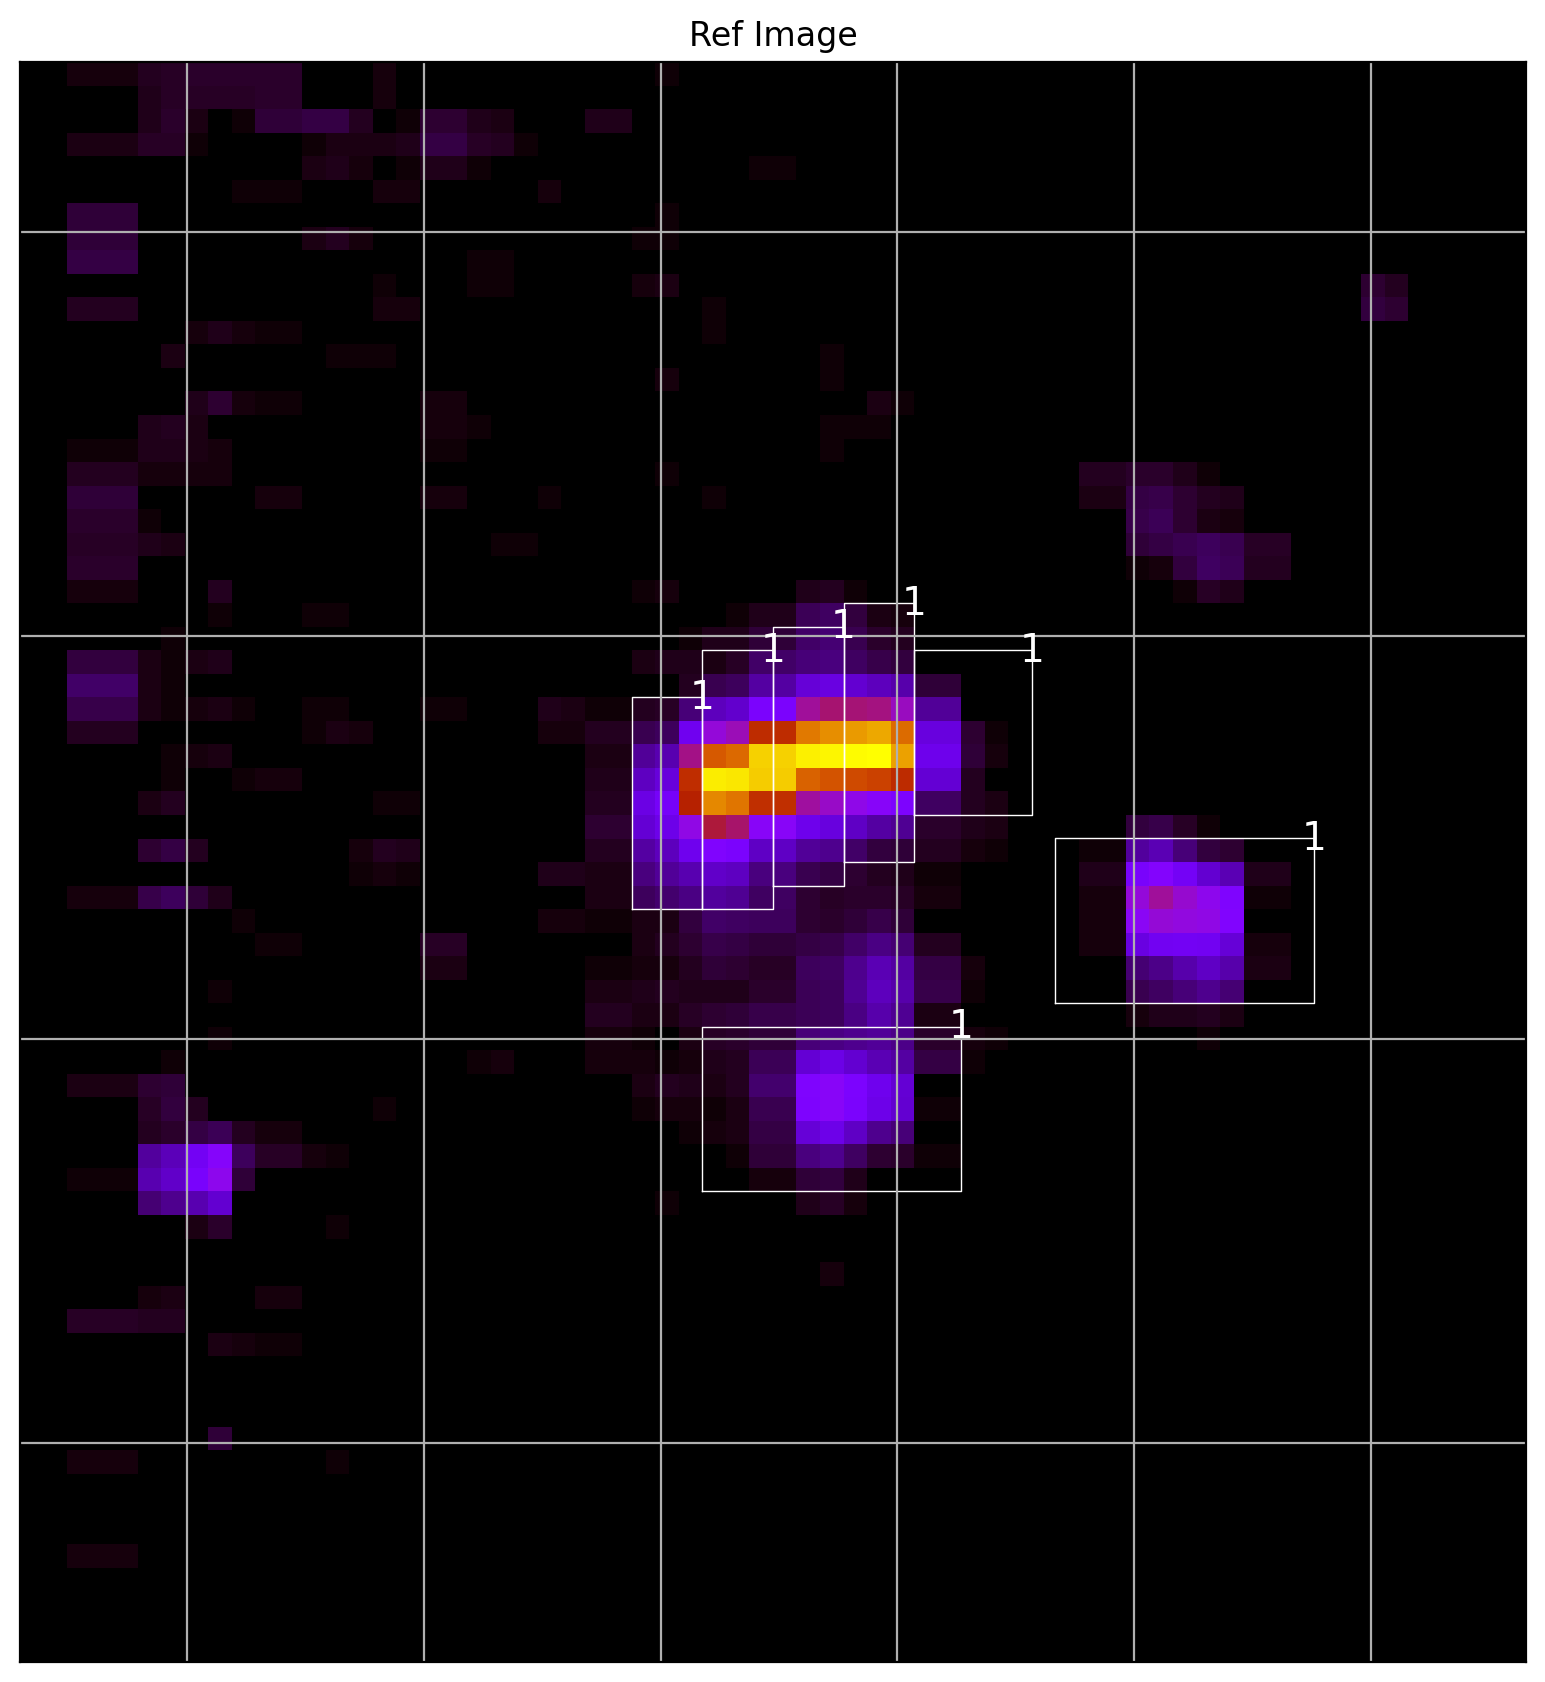

In [5]:
# draw whitelight image
plt.close()
fig = plt.figure(figsize=(8,8), dpi=200)
# ax = fig.add_subplot(111, projection=wcs_ref)
ax = fig.add_axes((0,0,1,1), projection=wcs_ref, polar=False)


bp.show_wl_image(ax, wl_image, title="Ref Image")
# sl_of_interest = [sightlines[2]]
bp.plot_sightlines_wcs(ax, wcs_ref, sightlines, label=sl.label, lw=0.5, show_label=True)

# display(fig.canvas) # cool, interactive canvas in notebook (don't work for me yet)
display(fig) # plots the figure as a static png


In [ ]:
# 1. get KCWI reference image and sightline boxes 
xs, ys, szs = bus.load_OLD_sightlines()
wl_image, wcs_ref = bio.load_narrowband_reference_image(global_narrowband_min, global_narrowband_max)

# 2. get 1 KCWI observation and pick sightline #3 (which ever is strongest)
obs = bio.get_corrected_kcwi_data(global_narrowband_min, global_narrowband_max)
# 3. extract the flux and error spectra for sightline #3 
# 4. plot the flux and error spectra
# 5. pick a continnum wavelength range in the flux spectra and mark it on the plot
# 6. calculate the median, stddev and SNR for the wavelength range
# 7. plot the "clipped" flux and error spectra
# 8. plot the median value as a horizontal red dashed line
# 9. plot the +/- stddev as a horizontal solid blue lines    

In [ ]:
def create_nb_spec(xspec, nb_min, nb_max):
    """ creates a narrowband XSpectrum1D object  """
    wave = xspec.wavelength.value
    spec = xspec.flux.value
    sig = xspec.sig.value
    
    slices = np.where((wave >= nb_min) & (wave <= nb_max))[0]
    slices = slices[slices < spec.shape[0]]  # Ensure slices are within bounds

    wave_slice = wave[slices]
    spec_slice = spec[slices]
    sig_slice = sig[slices]
    
    return XSpectrum1D.from_tuple((wave_slice, spec_slice, sig_slice)) 

In [ ]:
def plot_spectra_with_inset(sl, xspec, label=f"Sightline: {sl.label}", figsize=(8,2), dpi=200, fontsize=12, nb_spec=None, cont_med=None, cont_sig=None):
    """plot_spectra plots the associated XSpectrum1D with a single sightline. 
    Args:   sl (Sightline): _description_
            spec_block (spec,var,wave): _description_
    """
    wave = xspec.wavelength.value
    spec = xspec.flux.value
    err = xspec.sig.value
    
    plt.close()
    fig, main_ax = plt.subplots(figsize=figsize)
#     fig = plt.figure(figsize=figsize, dpi=dpi)
#     ax_spec = fig.add_axes((0,0,1,1))

    main_ax.plot(wave, spec, '-', color="k", linewidth=0.5, label="flux")
    main_ax.set_xlabel('wavelength (Angstroms)')
    main_ax.set_ylabel('Flux', color='k', rotation=90)  # Primary y-axis label, rotated
    main_ax.tick_params(axis='y', labelcolor='k')
    main_ax.plot(wave, err, '-', color="r", linewidth=0.5, label="error")
    main_ax.legend(loc='upper right', fontsize=fontsize-2)

    spec_med = np.median(spec)
    spec_sig = np.std(spec)
    err_med = np.median(err)
    err_sig = np.std(err)
    main_ax.text(0.05, 0.95, 
            f"""{label}
 """,
            color="w", 
            fontsize = fontsize, 
            ha='left', va='top',
            transform=main_ax.transAxes)
    main_ax.text(0.05, 0.92, 
            f"""
Full spectrum stats:
 - spec_med = {spec_med:0.4f}
 - spec_sig = {spec_sig:0.5f}
 - err_med = {err_med:0.4f}
 - err_sig = {err_sig:0.5f}
 - SNR (spec_med/err_med) = {(spec_med/err_med):0.4f}
""",
            color="w", 
            fontsize = fontsize*0.75, 
            ha='left', va='top',
            transform=main_ax.transAxes)
    # print(f"median = {med}, stddev = {stddev}, SNR = {med/stddev}") 

    main_ax.set_facecolor('darkgrey')
    
    if nb_spec is not None:        
        nb_wave = nb_spec.wavelength.value
        nb_flux = nb_spec.flux.value
        nb_sig  = nb_spec.sig.value
        
        main_ax.vlines([nb_wave[0],nb_wave[-1]], -0.001, 0.1, color='g', linestyle='-', lw=0.5)

        # this is an inset axes over the main axes
        right_inset_ax = fig.add_axes([.65, .45, .2, .2], facecolor='w')
        right_inset_ax.plot(nb_wave, nb_flux, '-', color="k", linewidth=0.5, label="flux")
        right_inset_ax.tick_params(axis='y', labelcolor='k')
        right_inset_ax.xaxis.set_ticks([nb_wave[0], nb_wave[-1]])

        right_inset_ax.plot(nb_wave, nb_sig, '-', color="r", linewidth=0.5, label="error")
        right_inset_ax.set(title='Continuum')
        if cont_med is not None:
            right_inset_ax.hlines(cont_med, nb_wave[0], nb_wave[-1], color='r', linestyle='--', lw=0.5)
            
        if cont_sig is not None:
            right_inset_ax.hlines([cont_med+cont_sig, cont_med-cont_sig], nb_wave[0], nb_wave[-1], color='b', linestyle='-', lw=0.5)
        
        main_ax.text(0.05, 0.6, 
                     f"""
Continuum spectrum stats:
 - cont_med = {cont_med:0.4f}
 - cont_sig = {cont_sig:0.5f}
 - SNR (cont_med/cont_sig) = {(cont_med/cont_sig):0.3f}
""",
            color="w", 
            fontsize = fontsize*0.75, 
            ha='left', va='top',
            transform=main_ax.transAxes)

    display(fig) # plots the figure as a static png



In [ ]:
def get_stats(xspec):
    """ compute stats on the flux and err waveforms """
    
    wave = xspec.wavelength.value
    flux = xspec.flux.value
    sig = xspec.sig.value    
    
    stats={}
    stats['wave_min'] = np.min(wave)
    stats['wave_max'] = np.max(wave)
    stats['flux_med'] = np.median(flux)
    stats['flux_sig'] = np.std(flux)
    stats['err_med'] = np.median(sig)
    stats['err_sig'] = np.std(sig)
    
    stats['SNR(flux_med/flux_sig)'] = stats['flux_med']/stats['flux_sig']
    stats['SNR(flux_med/err_med)'] = stats['flux_med']/stats['err_med']
    stats['SNR(med(flux / sig))'] = np.median(flux / sig)
    stats['SNR(flux_sig/flux_med)'] = stats['flux_sig']/stats['flux_med']
   
    return stats

In [ ]:
def plot_spectra(sl, xspec, stats=None, label=f"Sightline: {sl.label}", figsize=(8,2), dpi=200, fontsize=12):
    """plot_spectra plots the associated XSpectrum1D with a single sightline. 
    Args:   sl (Sightline): _description_
            spec_block (spec,var,wave): _description_
    """
    wave = xspec.wavelength.value
    spec = xspec.flux.value
    err = xspec.sig.value
    
    plt.close()
    fig, main_ax = plt.subplots(figsize=figsize)

    main_ax.plot(wave, spec, '-', color="k", linewidth=0.5, label="flux")
    main_ax.set_xlabel('wavelength (Angstroms)')
    main_ax.set_ylabel('Flux', color='k', rotation=90)  # Primary y-axis label, rotated
    main_ax.tick_params(axis='y', labelcolor='k')
    main_ax.plot(wave, err, '-', color="r", linewidth=0.5, label="error")
    main_ax.legend(loc='upper right', fontsize=fontsize-2)
    
    main_ax.text(0.05, 0.95, 
            f"""{label}""",
            color="w", 
            fontsize = fontsize, 
            ha='left', va='top',
            transform=main_ax.transAxes)
    main_ax.text(0.05, 0.90, 
            f"""
Spectrum stats ({stats['wave_min']:0.1f} to {stats['wave_max']:0.1f}):
 - flux_med = {stats['flux_med']:0.4f}
 - flux_sig = {stats['flux_sig']:0.5f}
 - err_med = {stats['err_med']:0.4f}
 - err_sig = {stats['err_sig']:0.5f}
 
 - SNR (flux_med/flux_sig) = {(stats['SNR(flux_med/flux_sig)']):0.4f}
 - SNR (flux_med/err_med) = {(stats['SNR(flux_med/err_med)']):0.4f}
 - SNR (med(flux / sig)) = {(stats['SNR(med(flux / sig))']):0.4f}
""",
            color="k", 
            fontsize = fontsize*0.75, 
            ha='left', va='top',
            transform=main_ax.transAxes)
    # print(f"median = {med}, stddev = {stddev}, SNR = {med/stddev}") 

    main_ax.set_facecolor('darkgrey')
    
    display(fig) # plots the figure as a static png
    
    

=============== BEGINNING EXTRACTION FOR RA:217.4789781160452 DEC:12.042572730362634 ==================


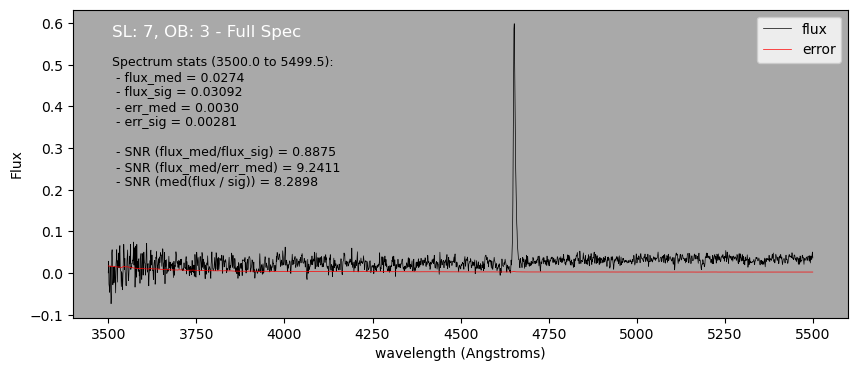

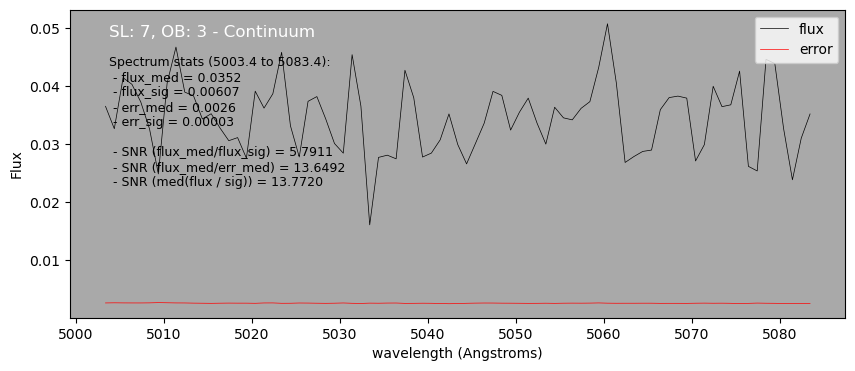

SNR = 5.791070938110352


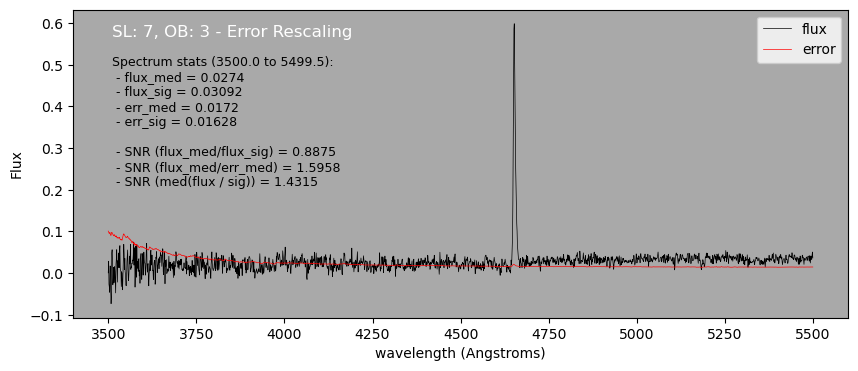

In [ ]:
Sightline:sl = sl_of_interest
sl_radec = sl.radecs
ob_of_interest = 3
ob = obs[ob_of_interest]

orig_spec = bo.extract_spectra_from_obs(sl_radec, [ob])[0]
spec_stats = get_stats(orig_spec)
plot_spectra(sl, orig_spec, stats=spec_stats, label=f"SL: {sl.label}, OB: {ob_of_interest} - Full Spec",  figsize=(10,4), dpi=200)

# the continuum
cont_range = [5003, 5084]
cont_spec = create_nb_spec(orig_spec, nb_min=cont_range[0], nb_max=cont_range[1])
cont_stats = get_stats(cont_spec)
plot_spectra(sl, cont_spec, stats=cont_stats, label=f"SL: {sl.label}, OB: {ob_of_interest} - Continuum",  figsize=(10,4), dpi=200)


# 2. find continuum region in flux_spectra, calculate the median_flux and flux_stddev 
# 3. SNR = median_flux / flux_stddev
# SNR = cont_stats['SNR(flux_med/err_med)']
SNR = cont_stats['SNR(flux_med/flux_sig)']
print(f"SNR = {SNR}")
# 4. new_error_spectra = SNR * error_spectra
new_wave = orig_spec.wavelength.value
new_flux = orig_spec.flux.value
old_sig = orig_spec.sig.value

new_sig = SNR * old_sig

new_xspec = XSpectrum1D.from_tuple((new_wave, new_flux, new_sig)) 
new_stats = get_stats(new_xspec)

plot_spectra(sl, new_xspec, stats=new_stats, label=f"SL: {sl.label}, OB: {ob_of_interest} - Error Rescaling",  figsize=(10,4), dpi=200)

# 5. XSpec.write_to_fits(wave, flux_spectra, new_error_spectra)